In [2]:
from IPython.display import display, Math, Latex

import pandas as pd
import numpy as np
import numpy_financial as npf
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import random

## Group Assignment
### Team Number: 14
### Team Member Names: Max Cheng, Nathan Chu, Rahim Merchant, Matthew Yang
### Team Strategy Chosen: Safe

In [3]:
# Constant/Variable Declarations

# Since we must spend all our cash, let's check to make sure it's 0 at the end of our program
capital = 500000

# By the assignment requirements...
min_weight = 0.02
max_weight = 0.25

# Final output in Jupyter Notebook
Portfolio_Final = pd.DataFrame()

# DataFrame that our program should write to Stocks_Group_14.csv
Stocks_Final = pd.DataFrame()

In [4]:
'''
- Reads Tickers.csv as a DataFrame
- Turns the first (and only) column into a list
NOTE: Check what the CSV file we will be receiving for the comeptition looks like.
      We will probably have to update this line of code...
'''

# Tickers Easy.csv: Dummy list consisting of 25 large cap stocks in the s&p500
ticker_lst = pd.read_csv("Tickers Easy.csv", header=None)[0].tolist()

In [5]:
'''
TODO: Filter the list for invalid or impermissible tickers
- US listed stocks only (so nothing ending in .TO, but we would have to account for other cases too)
'''
american_tickers = ticker_lst

In [63]:
'''
- How do we store the ticker names of the stocks that failed to download?
- The dates at the bottom few rows look like like dividend payments? How do we remove them?
'''

start_date = '2022-01-01'
end_date = '2022-11-16'

data = yf.download(tickers = american_tickers,
                   # threads = True
                   # prepost = True
                   # group_by='ticker',
                   start=start_date,
                   end=end_date).dropna(how='all')
                   
data

[*********************100%***********************]  25 of 25 completed


Adj Close                                                 \
                  AAPL        ABBV        AMZN        BAC         CVX   
Date                                                                    
2022-01-03  180.959732  130.341797  170.404495  45.393047  115.113411   
2022-01-04  178.663071  130.091553  167.522003  47.172203  117.207954   
2022-01-05  173.910660  130.774918  164.356995  46.376007  117.970490   
2022-01-06  171.007507  130.158936  163.253998  47.309818  118.974327   
2022-01-07  171.176514  129.822052  162.554001  48.341923  120.682785   
...                ...         ...         ...        ...         ...   
2022-11-09  134.869995  147.619995   86.139999  36.520000  176.564194   
2022-11-10  146.869995  149.720001   96.629997  38.130001  179.908325   
2022-11-11  149.699997  150.160004  100.790001  38.410000  185.028732   
2022-11-14  148.279999  151.740005   98.489998  37.759998  185.118027   
2022-11-15  150.039993  153.039993   98.940002  37.700001  186.606522   

                                                                        ...  \
                  GOOG       GOOGL          HD         JNJ         JPM  ...   
Date                                                                    ...   
2022-01-03  145.074493  144.991501  401.023010  168.227264  156.752411  ...   
2022-01-04  144.416504  144.399506  405.144684  167.776169  162.694839  ...   
2022-01-05  137.653503  137.774994  399.649078  168.894150  159.720444  ...   
2022-01-06  137.550995  137.747498  398.196686  168.315536  161.417328  ...   
2022-01-07  137.004501  137.016998  386.273132  170.590729  163.016693  ...   
...                ...         ...         ...         ...         ...  ...   
2022-11-09   87.400002   87.320000  286.750000  172.449997  129.740005  ...   
2022-11-10   94.169998   93.940002  311.700012  174.470001  135.080002  ...   
2022-11-11   96.730003   96.410004  314.940002  169.250000  135.300003  ...   
2022-11-14   96.029999   95.699997  306.920013  171.910004  133.910004  ...   
2022-11-15   98.720001   98.440002  311.929993  172.389999  132.940002  ...   

                Volume                                                \
                  MSFT        NVDA        PEP         PFE         PG   
Date                                                                   
2022-01-03  28865100.0  39154700.0  5488900.0  57219200.0  9317300.0   
2022-01-04  32674300.0  52715400.0  4717600.0  66993100.0  9253800.0   
2022-01-05  40054300.0  49806400.0  6564600.0  52956400.0  9330200.0   
2022-01-06  39646100.0  45418600.0  4288700.0  37000400.0  7556000.0   
2022-01-07  32720000.0  40993900.0  4916000.0  27703400.0  6098500.0   
...                ...         ...        ...         ...        ...   
2022-11-09  27852900.0  45441400.0  4723600.0  15348100.0  5690700.0   
2022-11-10  46268000.0  70081900.0  6704100.0  20480600.0  8068700.0   
2022-11-11  34600900.0  65503700.0  7390500.0  20906700.0  7174400.0   
2022-11-14  31123300.0  52785200.0  5633000.0  26143000.0  8516200.0   
2022-11-15  31390100.0  54587600.0  5153600.0  25440500.0  7732400.0   

                                                                        
                   TSLA        UNH           V         WMT         XOM  
Date                                                                    
2022-01-03  103931400.0  3033600.0   7694500.0   6902200.0  24282400.0  
2022-01-04  100248300.0  3908100.0  10629300.0  11310000.0  38584000.0  
2022-01-05   80119800.0  3921100.0   9594600.0  11806000.0  34033300.0  
2022-01-06   90336600.0  6555200.0   7877500.0   7276300.0  30668500.0  
2022-01-07   84164700.0  5494200.0  10702100.0   6574500.0  23985400.0  
...                 ...        ...         ...         ...         ...  
2022-11-09  127062700.0  2672600.0   7320200.0   5310700.0  19522800.0  
2022-11-10  132703000.0  3426400.0   8048900.0   6770200.0  20146700.0  
2022-11-11  114229200.0  7032900.0   9600700.0   6419700.0  20515100.0 

In [7]:
'''
TODO: Second filtering iteration
- Remove stocks that failed downloads
- Average MONTHLY volume of at least 200,000 shares from Jan 01, 2022 to Oct 31, 2022
'''

filtered_tickers = american_tickers

In [8]:
'''
TODO: Calculations
Let's discuss how we want to approach this from a finance POV before committing to deep into anything

Some ideas...
1. Fetch beta for each stock, find a combination of 25 that sum to a number close to 0
- Pros: Seems easy enough (famous last words)
- Cons: Everything is becoming more correlated now, we may have to look at individual correlations

2. Create a correlation matrix (Correlation of each stock with each other stock), then pick the
   PAIRS that sum to the lowest number. Ideally, we would have a portfolio of pairs of stocks,
   with the 2 stocks in each pair having perfect NEGATIVE correlation. Thus the portfolio never
   fluctuates.
'''

portfolio_stocks = filtered_tickers

In [36]:
def generate_allocation(portfolio_size):
    allocation = []
    
    for i in range(portfolio_size):
        n = random.randint(20, 100)
        allocation.append(n)

    allocation_sum = np.sum(allocation)

    for j in range(portfolio_size):
        allocation[j] = allocation[j]/allocation_sum
    
    if min(allocation) < min_weight:
        return generate_allocation(portfolio_size)
    elif max(allocation) > max_weight:
        return generate_allocation(portfolio_size)
    else:
        return allocation

generate_allocation(len(portfolio_stocks))

[0.027848101265822784,
 0.028481012658227847,
 0.02911392405063291,
 0.05759493670886076,
 0.02278481012658228,
 0.024050632911392405,
 0.05886075949367089,
 0.029746835443037974,
 0.056329113924050635,
 0.06139240506329114,
 0.03670886075949367,
 0.024683544303797468,
 0.049367088607594936,
 0.06329113924050633,
 0.02088607594936709,
 0.027848101265822784,
 0.06139240506329114,
 0.05379746835443038,
 0.021518987341772152,
 0.04430379746835443,
 0.04240506329113924,
 0.028481012658227847,
 0.027848101265822784,
 0.06139240506329114,
 0.039873417721518985]

In [68]:
def get_returns(stocks):
    daily_returns = pd.DataFrame()
    temp = pd.DataFrame()
    
    for stock in stocks:
        daily_returns[stock] = data['Adj Close'].loc[start_date:end_date][stock]
    
    weekly_returns = daily_returns.resample('W').ffill()
    return weekly_returns.pct_change().dropna()
    
get_returns(portfolio_stocks)

,AAPL,MSFT,AMZN,TSLA,GOOG,GOOGL,UNH,JNJ,XOM,JPM,...,CVX,LLY,MA,ABBV,PFE,MRK,PEP,BAC,KO,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-16,0.005228,-0.012228,-0.002559,0.022055,0.020306,0.017980,0.022002,-0.035125,0.043409,-0.055456,...,0.031432,-0.059268,0.006736,0.017793,-0.013819,0.013449,0.008961,-0.025823,0.017570,0.001173
2022-01-23,-0.061594,-0.045680,-0.120237,-0.100714,-0.069352,-0.065450,-0.016045,-0.017695,0.004174,-0.081132,...,-0.015896,-0.004342,-0.045843,-0.028630,-0.039309,-0.017203,-0.008085,-0.062409,-0.015312,-0.033572
2022-01-30,0.048765,0.041313,0.009359,-0.103348,0.024579,0.023011,0.010603,0.041972,0.043093,0.010546,...,0.029155,0.008393,0.077250,0.045007,0.036997,0.011503,-0.008897,0.021149,0.006452,-0.019046
2022-02-06,0.013384,-0.007526,0.094886,0.090943,0.072973,0.074555,0.036712,-0.000931,0.081429,0.040584,...,0.040349,-0.011546,-0.000811,0.019794,-0.024480,-0.028925,-0.001042,0.052540,0.001972,0.013162
2022-02-13,-0.021753,-0.035628,-0.027569,-0.068579,-0.062133,-0.062882,-0.010431,-0.022840,-0.003818,0.008915,...,0.021563,-0.026953,-0.032522,0.009669,-0.041887,-0.024440,-0.022668,-0.007456,-0.010991,-0.028709
2022-02-20,-0.007946,-0.022081,-0.004514,-0.003512,-0.027306,-0.028891,-0.021584,-0.019685,-0.035532,-0.011564,...,-0.028739,0.023641,0.000487,0.014224,-0.044309,-0.003523,-0.005161,-0.040902,0.037320,0.019656
2022-02-27,-0.014644,0.032577,0.007778,-0.054972,0.031058,0.031107,0.016973,0.016161,0.006205,-0.027409,...,0.052166,0.043860,-0.002325,0.038256,-0.016691,-0.000655,0.003995,-0.020453,0.004957,-0.011667
2022-03-06,-0.010191,-0.025058,-0.052979,0.035092,-0.017823,-0.018987,0.048135,0.020964,0.080293,-0.091708,...,0.130147,0.047917,-0.103850,0.006821,0.019489,0.019785,-0.009145,-0.085957,-0.004455,0.047221
2022-03-13,-0.051725,-0.033775,-0.000800,-0.051223,-0.012462,-0.015435,-0.028780,-0.000767,0.009870,-0.040997,...,0.077214,0.013048,-0.018049,-0.009963,0.033299,0.005525,-0.072519,-0.015140,-0.074317,-0.005252


In [64]:
def calculate_return(stocks, returns, allocation):
    '''
    params
    stocks: list of stocks
    returns: dataframe of daily returns
    allocation: list of weightings
    '''
    
    portfolio_daily_return = []
    daily_return = 0
    count = 0
    
    for date in returns.index:
        for stock in stocks:
            daily_return += returns.loc[date][stock] * allocation[count]
            count += 1
        
        portfolio_daily_return.append(daily_return)
        daily_return = 0
        count = 0
    
    return portfolio_daily_return

calculate_return(portfolio_stocks, 
                 get_returns(portfolio_stocks), 
                 generate_allocation(len(portfolio_stocks)))

[-0.0013287297563687912,
 -0.04787210423923457,
 0.017928778828608657,
 0.014646942627901408,
 -0.02565562983187275,
 -0.01305951634700121,
 0.004100727703475095,
 -0.007670646108512865,
 -0.019487329972178686,
 0.06527069656452433,
 0.020321547903882,
 0.0006028868990740567,
 -0.0003098982696453298,
 -0.025779833270010395,
 -0.033398573544550926,
 -0.017201075984545205,
 0.002445247459087329,
 -0.018167105873955813,
 -0.03222568265069896,
 0.06073272444709146,
 -0.012327424127726626,
 -0.04433738760472401,
 -0.055183331248164644,
 0.06882291658107746,
 -0.0240216495864708,
 0.027697267425900028,
 -0.00914332218423734,
 0.015331725587091994,
 0.03412447122039705,
 -0.00258479912631958,
 0.02785919363994536,
 -0.008285054996928456,
 -0.03850980518951131,
 -0.030023097838637967,
 0.033910422480634875,
 -0.04205960362491177,
 -0.03991767590842731,
 -0.025458699301948027,
 0.012102596147379385,
 -0.005188377359301944,
 0.05352119767916821,
 0.01868021956264931,
 -0.03335960001481392,
 0.05

In [69]:
portfolio_performance = pd.DataFrame()
portfolio_expected_returns = []
portfolio_risks = []

number_of_portfolios = 2000
weights = []

for i in range(number_of_portfolios):
    weights.append(generate_allocation(len(portfolio_stocks)))

for j in range(number_of_portfolios):
    temp_portfolio = calculate_return(portfolio_stocks, 
                                      get_returns(portfolio_stocks), 
                                      weights[j])
    portfolio_expected_returns.append(np.mean(temp_portfolio))
    portfolio_risks.append(np.std(temp_portfolio))

portfolio_performance['Expected Return'] = portfolio_expected_returns
portfolio_performance['Risk'] = portfolio_risks
portfolio_performance

,Expected Return,Risk
0,-0.001058,0.031574
1,-0.000441,0.029608
2,-0.000953,0.029503
3,-0.001304,0.031628
4,-0.000835,0.031246
...,...,...
1995,-0.000316,0.029624
1996,-0.000798,0.030274
1997,-0.001415,0.031119
1998,-0.001078,0.031835


In [70]:
least_risky_portfolio = weights[portfolio_performance.loc[portfolio_performance['Risk'] 
                                                          == min(portfolio_performance['Risk'])].index.tolist()[0]]
least_risky_portfolio


[0.027247956403269755,
 0.029291553133514985,
 0.02111716621253406,
 0.02452316076294278,
 0.022479564032697547,
 0.03337874659400545,
 0.043596730245231606,
 0.0681198910081744,
 0.04564032697547684,
 0.06267029972752043,
 0.04155313351498638,
 0.05653950953678474,
 0.04632152588555858,
 0.021798365122615803,
 0.020435967302452316,
 0.06198910081743869,
 0.06267029972752043,
 0.03201634877384196,
 0.027247956403269755,
 0.02111716621253406,
 0.05040871934604905,
 0.04632152588555858,
 0.039509536784741145,
 0.04427792915531335,
 0.0497275204359673]

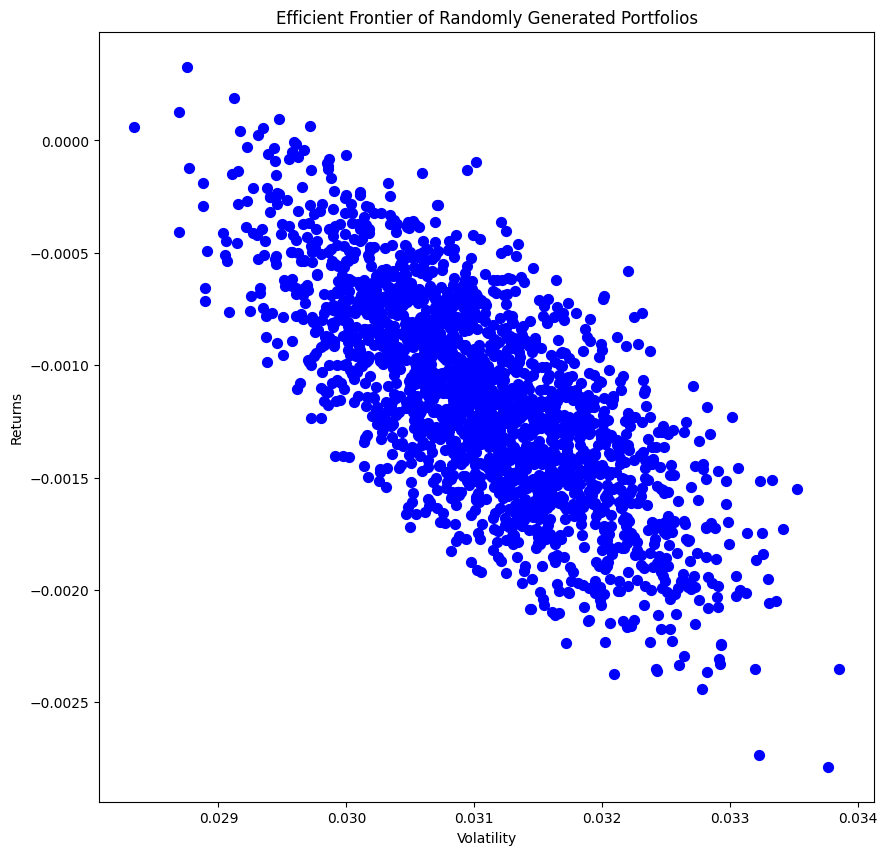

In [72]:
plt.subplots(figsize=[10, 10])

plt.scatter(
    x=portfolio_performance['Risk'], y=portfolio_performance['Expected Return'], s=10, alpha=0.7
)

plt.scatter(
    portfolio_performance['Risk'], portfolio_performance['Expected Return'], color="b", marker=".", s=200
)

plt.title("Efficient Frontier of Randomly Generated Portfolios")
plt.xlabel("Volatility")
plt.ylabel("Returns")

plt.show()

In [12]:
# Write to CSV

Stocks_Final.to_csv("Stocks_Group_14.csv")

## Contribution Declaration

The following team members made a meaningful contribution to this assignment:

Max Cheng, Nathan Chu, Rahim Merchant, Matthew Yang